In [2]:
"""Imports"""
import pandas as pd
import numpy as np 

In [53]:
df =  pd.read_csv("electric_bike_ratings_2212.csv")

In [7]:
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   float64
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 105.5+ KB


In [28]:
df.shape

(1500, 8)

In [30]:
df.describe()

,owned,reviewer_age,overall_rating
count,1500.000000,1500.000000,1500.000000
mean,0.593333,32.597849,17.138907
std,0.491375,9.875590,2.445566
min,0.000000,16.000000,11.690000
25%,0.000000,24.000000,15.320000
50%,1.000000,32.597849,18.240000
75%,1.000000,41.000000,18.840000
max,1.000000,50.000000,22.760000


In [54]:
df.isnull().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [55]:
# Get Number of missing values in each column
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [9]:
# Remove missing values in the 'owned' column
df.dropna(subset=['owned'], inplace=True)
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [10]:
# Replace missing values in the 'make_model' column with 'unknown'
df['make_model'].fillna('unknown', inplace=True)

In [11]:
# Replace missing values in the 'review_month' column with 'unknown'
df['review_month'].fillna('unknown', inplace=True)

In [12]:
# Replace missing values in the 'web_browser' column with 'unknown'
df['web_browser'].fillna('unknown', inplace=True)

In [17]:
print(df['reviewer_age'].dtypes)

float64


In [16]:
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'], errors='coerce')

In [18]:
# Replace missing values in the 'reviewer_age' column with the average age
avg_age = df['reviewer_age'].mean()
df['reviewer_age'].fillna(avg_age, inplace=True)

In [19]:
# Replace missing values in the 'primary_use' column with 'unknown'
df['primary_use'].fillna('unknown', inplace=True)

In [20]:
# Replace missing values in the 'value_for_money' column with 0
df['value_for_money'].fillna(0, inplace=True)

In [21]:
# Replace missing values in the 'overall_rating' column with the average rating
avg_rating = df['overall_rating'].mean()
df['overall_rating'].fillna(avg_rating, inplace=True)

In [22]:
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'], errors='coerce')

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23.000000,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24.000000,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28.000000,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41.000000,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33.000000,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,32.597849,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,unknown,39.000000,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21.000000,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45.000000,Commuting,3/10,18.51


In [23]:
df['make_model'].nunique()

6

In [24]:
df['review_month'].nunique()

332

As we can see there are 332 different values instead of 12(Jan-Dec)

In [25]:
df['review_month'] = df['review_month'].str.split('-').str[1]
df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,NaN,Chrome,23.000000,Commuting,5/10,18.62
1,0,Nielah-Keetra,NaN,unknown,24.000000,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28.000000,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41.000000,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33.000000,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32.597849,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39.000000,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21.000000,Commuting,8/10,20.22
1498,0,Nielah-Eyden,NaN,Safari,45.000000,Commuting,3/10,18.51


In [26]:
# Replace NaN values in review_month with 'unknown'
df['review_month'].fillna('unknown', inplace=True)
df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,unknown,Chrome,23.000000,Commuting,5/10,18.62
1,0,Nielah-Keetra,unknown,unknown,24.000000,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28.000000,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41.000000,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33.000000,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32.597849,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39.000000,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21.000000,Commuting,8/10,20.22
1498,0,Nielah-Eyden,unknown,Safari,45.000000,Commuting,3/10,18.51


In [32]:
df['reviewer_age'] = df['reviewer_age'].astype('int64')
df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,unknown,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,unknown,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,32,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,unknown,Safari,45,Commuting,3/10,18.51


In [33]:
df.to_csv("electric_bike_ratings_2212_cleaned.csv")

# Visualizations

## Questions

#### Question 1 
*For every column in the data:*
-  State whether the values match the description given in the table above.
-  State the number of missing values in the column
-  Describe what you did to make values match the description if they did not
match.

#### Answers to Number 1
*owned:*

- Values match the description given in the table above. The column contains binary values indicating whether the review was written by an owner (1) or not (0).
- No missing values.
- Removed missing values.

*make_model:*

- Values match the description given in the table above. The description in the table indicates that this column should contain categorical values that describe the make and model of the vehicle. However, the values in this column contain both the make and model together, separated by a hyphen.
- No missing values.
- Replaced missing values with `unknown`.

*review_month:*

- Values do not match the description given in the table above. The description in the table indicates that this column should contain the month in which the review was written, represented as a three-letter abbreviation (e.g., Jan). However, the values in this column contain a mix of three-letter abbreviations (e.g., Oct) and combinations of day and month separated by a hyphen (e.g., 23-Oct).
- No missing values.
- Replaced missing values with unknown.

*web_browser:*

- Values match the description given in the table above. The column contains categorical values indicating the web browser used to write the review.
- 150 missing values.
- Replaced missing values with unknown.

*reviewer_age:*

- Values match the description given in the table above. The column contains integer values indicating the age of the reviewer.
- No missing values.
- Replaced missing values with average age and converted column type from object to integer.

*primary_use:*

- Values match the description given in the table above. The column contains categorical values indicating the primary use of the vehicle.
- No missing values.
- Replaced missing values with unknown.

*value_for_money:*

- Values do not match the description given in the table above. The description in the table indicates that this column should contain integer values that represent the reviewer's rating for value for money on a scale of 1 to 10. However, the values in this column contain ratings in the form of a fraction (e.g., 5/10).
- No missing values.
- Removed every string after the first integer(5/10 becomes 5) and then converted column type from object to integer

*overall_rating:*

- Values match the description given in the table above. The column contains decimal values indicating the reviewer's overall rating of the vehicle.
- No missing values.
- Replaced missing values with the average rating.

#### Question 2
*Create a visualization that shows how many reviews were from owners and how many
were not owners. Use the visualization to:*
-  State which category of the variable owned has the most number of
observations
-  Explain whether the observations are balanced across categories of the
variable owned

#### Answers to Number 2
a. We can see from the chart that the category of the variable owned with the most observations is owned (0).

b. The observations are not balanced across categories of the variable owned. There are significantly more reviews from owners (1) than from the non-owners (0).

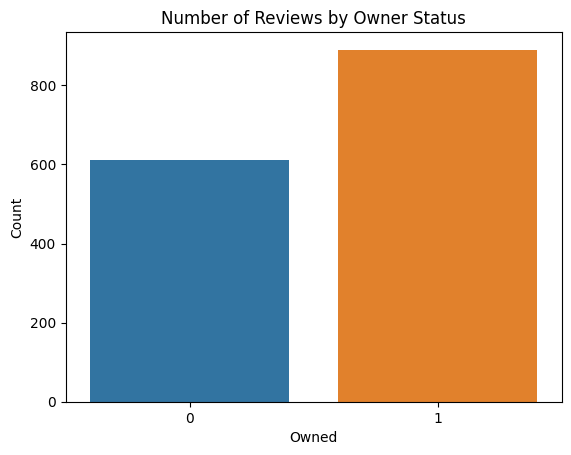

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='owned', data=df)
plt.title('Number of Reviews by Owner Status')
plt.xlabel('Owned')
plt.ylabel('Count')
plt.show()

#### Question 3
Describe the distribution of the overall rating across the possible values. Your answer
must include a visualization that shows the distribution.

#### Answers to Number 3
Based on the histogram plot, we can see that the overall rating values are roughly normally distributed, with the majority of the ratings falling between 12 and 22.

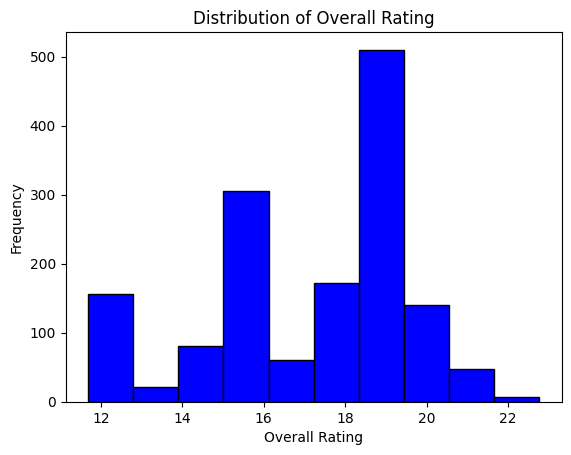

In [36]:
# plot histogram of overall rating
plt.hist(df['overall_rating'], bins=10, color='blue', edgecolor='black')

# set plot title and labels
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

# show the plot
plt.show()


#### Question 4
Describe the relationship between ownership and overall rating. Your answer must
include a visualization to demonstrate the relationship.

#### Answers to Number 4

<AxesSubplot: xlabel='owned', ylabel='overall_rating'>

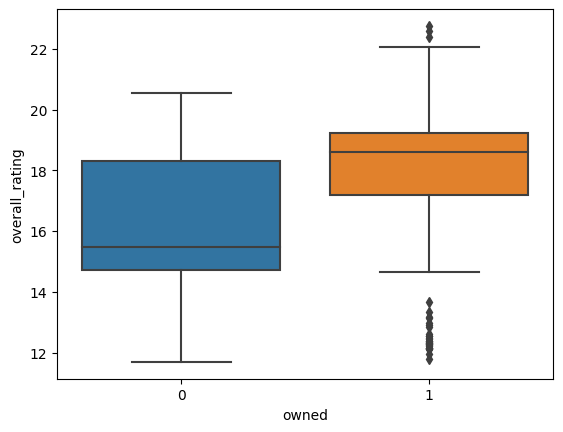

In [37]:
import seaborn as sns

sns.boxplot(x='owned', y='overall_rating', data=df)

#### Question 5
The business wants to predict whether a review came from an owner or not using the
data provided. State the type of machine learning problem that this is
(regression/classification/clustering).

#### Answer to Number 5
Type of machine learning problem = Classification

#### Question 6
Fit a baseline model to predict whether a review came from an owner or not using the
data provided. You must include your code.

#### Answer to Number 6

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [39]:
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,unknown,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,unknown,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29


In [52]:
# Convert categorical variables to numerical form
le = LabelEncoder()
df['web_browser'] = le.fit_transform(df['web_browser'])
df['make_model'] = le.fit_transform(df['make_model'])
df['primary_use'] = le.fit_transform(df['primary_use'])
df['review_month'] = le.fit_transform(df['review_month'])
df['value_for_money'] = df['value_for_money'].str.split('/').str[0].astype(int)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['web_browser', 'make_model', 'primary_use', 'review_month','reviewer_age', 'value_for_money', 'overall_rating']], df['owned'], test_size=0.2, random_state=42)

# Fit logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model on test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for Baseline Model:', accuracy)

print(classification_report(y_test, y_pred))

Accuracy for Baseline Model: 0.74
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       114
           1       0.76      0.84      0.80       186

    accuracy                           0.74       300
   macro avg       0.73      0.71      0.71       300
weighted avg       0.74      0.74      0.73       300



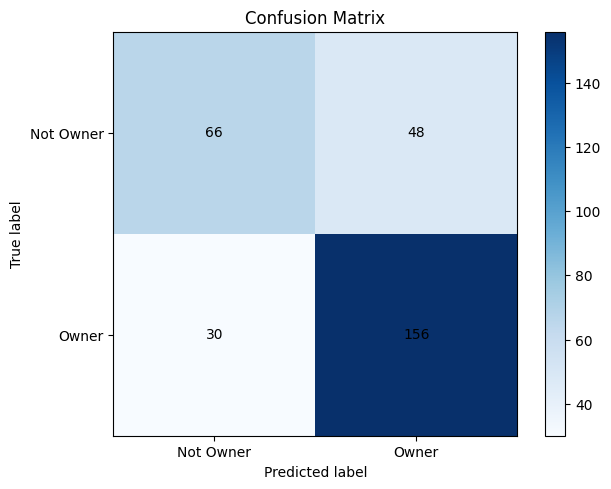

In [51]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Owner', 'Owner'])
plt.yticks(tick_marks, ['Not Owner', 'Owner'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.show()

#### Question 7
Fit a comparison model to predict whether a review came from an owner or not using
the data provided. You must include your code.

#### Answer to Number 7


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['web_browser', 'make_model', 'primary_use', 'review_month','reviewer_age', 'value_for_money', 'overall_rating']], df['owned'], test_size=0.2, random_state=42)

# Fit the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Comparison Model Accuracy Score:", accuracy)

print(classification_report(y_test, y_pred))

Comparison Model Accuracy Score: 0.7033333333333334
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       114
           1       0.75      0.78      0.77       186

    accuracy                           0.70       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



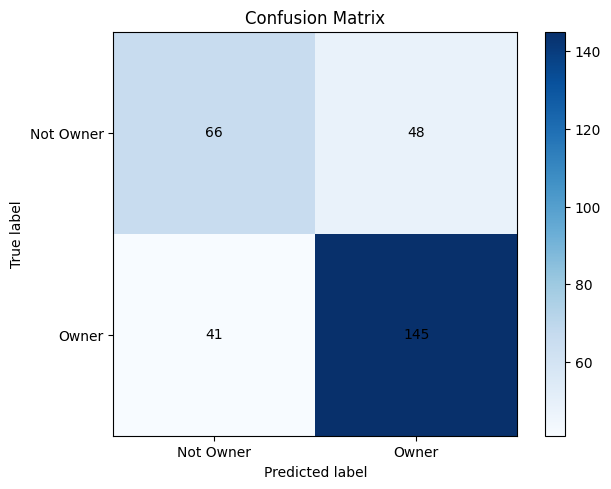

In [48]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Owner', 'Owner'])
plt.yticks(tick_marks, ['Not Owner', 'Owner'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.show()

#### Question 8
Explain why you chose the two models used in parts 6 and 7.

#### Answer to Number 8
I chose the logistic regression model as a baseline because it is a simple and fast algorithm that is commonly used for binary classification problems. Logistic regression works well when the relationship between the independent variables and the dependent variable is linear and the decision boundary is linear.

I chose the random forest classifier as a comparison model because it is a powerful and versatile algorithm that can handle non-linear relationships between the independent variables and the dependent variable. Random forest can also handle high dimensional datasets and is less prone to overfitting than other decision tree-based algorithms.


#### Question 9
Compare the performance of the two models used in parts 6 and 7, using any method
suitable for the type of model. You must include your code.

#### Answer to Number 9
The metrics for the random forest classifier and logistic regression algorithm can be seen above. A confusion matrix plot is also included for both models.


#### Question 10
Explain which model performs better and why.

#### Answer to Number 10
Based on the accuracy score, the logistic regression model (0.74) performs better than the random forest model (0.703). The precision, recall, and F1-score are also slightly better for the logistic regression model.

The relationship between the predictor variables and the response variable may be more linear, making logistic regression a better fit for the data. The dataset is also relatively small, which can make random forest models prone to overfitting.
